In [68]:
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import scipy


In [69]:
df=pd.read_csv("/content/drive/MyDrive/data/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Ввиду того что мы не являемся экспертами в области драгоценных камней обратимся за информацией к интернету.

Термин «карат» означает вес бриллианта, а не его размер. Tiffany измеряет бриллианты до 1/1000-й карата. Один карат равен 0,20 грамма.
Бриллиант может иметь больший вес в каратах, не выглядя больше, и два бриллианта одного веса в каратах могут иметь разный размер, если огранка одного глубже огранки другого. Другими словами, важно отметить, что вес в каратах не обязательно обозначает размер.
Сам по себе вес в каратах не определяет стоимость бриллианта. Например, два бриллианта в один карат могут значительно отличаться в цене с учетом их чистоты, цвета и огранки.

Материалы по теме

1. https://www.tiffany.ru/engagement/the-tiffany-guide-to-diamonds/carat/#:~:text=Термин%20«карат»%20означает%20вес%20бриллианта%2C,«маркиз»%2C%20изумрудная%2C%20«радиант»%20или%20«сердце»

2. https://selectingadiamond.com/all-you-need-to-know-about-diamond-table-and-diamond-depths/

3. https://aroma-avenue.ru/advise/kak-opredelit-cistotu-brillianta.html

# Немного о терминах
**cut** - огранка бриллианта. Огранка бриллианта относится к пропорциям частей бриллианта и к тому, насколько хорошо грани бриллианта отражают свет при воздействии прямого света.

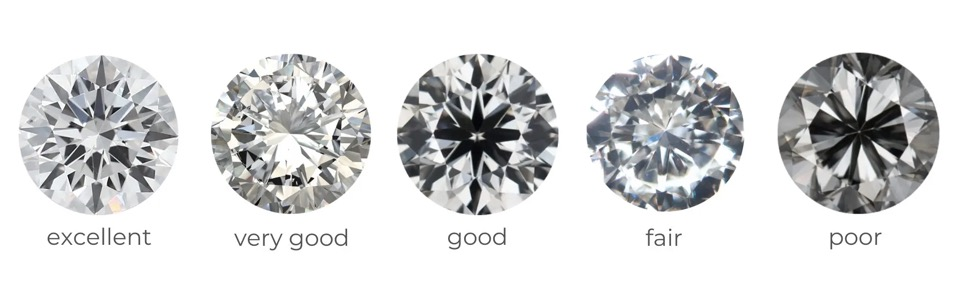

**table** -стол. table - это термин, используемый для описания верхней грани бриллиантового камня. Это, несомненно, самая крупная грань драгоценного камня, несмотря на то, что у камня уже есть несколько граней. Считается также, что это та часть камня, которая играет наиболее важную роль в характеристике его блеска и светоотдачи.
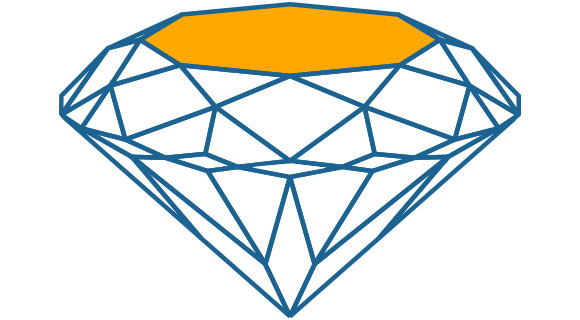




**depth** -глубины алмаза, представляет собой высоту бриллианта от его огранки до стола.

**table** и **depth**, несомненно, занимают два первых места в дискуссиях, связанных с огранкой бриллиантов (cut) и отражением света; учитывая тот факт, что физическая форма бриллианта, определяющая красоту и идеальный дизайн образца бриллианта определенной формы, чрезвычайно важна.

**clarity** - чистота бриллианта.В составе всех природных минералов есть некристаллизованные включения различных элементов, а также небольшие чужеродные кристаллы. Как правило, эти включения невооруженным глазом заметить невозможно. Они выявляются при многократном увеличении.

**color**  - цвет (оттенок) бриллианта. Оценка алмазов производится также по цвету. Правда, большинство кристаллов бесцветные. Лишь некоторым присущи дополнительные оттенки. Их цвет варьируется от светло-голубого до желтого и даже коричневого.


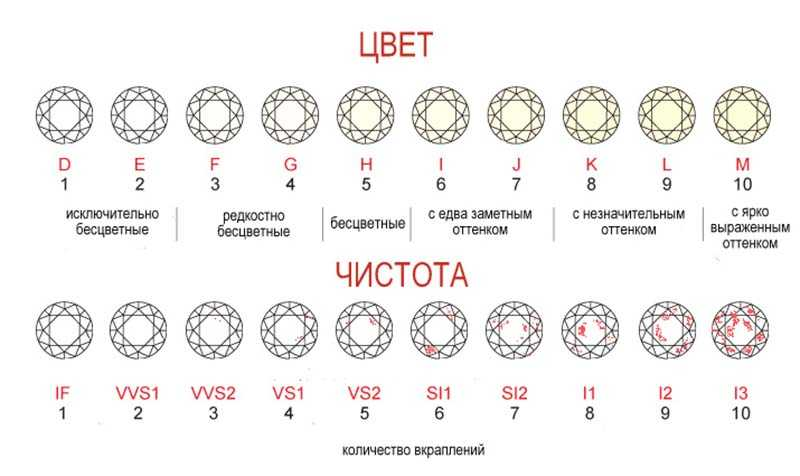

Все выводы будем делать на основании приведенной информации и статистических данных DataFrame

# Посмотрим на DataFrame

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [71]:
df.notnull().sum()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

* Вывод: пропусков нет, продолжаем просмотр DataFrame

# посмотрим на дубликаты

In [72]:
df[df.duplicated ()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


Вывод: мы нашли 146 дубликатов. С одной стороны возможно это реальные дубликаты, но есть вероятность что данные бриллианты были изготовленны автоматическим (машинным)  способом с помощью ПО для соблюдения пропорций из одного камня (одинаковые параметны цвета и чистоты). Оставим эти данные без изменение (на совести создателя этого DataFrame)

In [73]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [74]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [75]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [76]:
df.groupby("cut").mean()

<ipython-input-76-d4f65f42870f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


# Мы видим что столбец cut в DataFrame является некоей категорией, создадим новый столбец с присвоением категории номеров (в соответствии с таблицей выше).

In [77]:
def cut_nom(df_condition):
  df_condition["cut_nom"]=0
  for i in range(len(df_condition)):
    if df_condition["cut"][i]=='Ideal': df_condition["cut_nom"][i]=1
    elif df_condition["cut"][i]=='Premium': df_condition["cut_nom"][i]=2
    elif df_condition["cut"][i]=='Very Good': df_condition["cut_nom"][i]=3
    elif df_condition["cut"][i]=='Good': df_condition["cut_nom"][i]=4
    else: df_condition["cut_nom"][i]=5
  return df_condition

df_new=cut_nom(df)


<ipython-input-77-588e6567aa72>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-588e6567aa72>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-588e6567aa72>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-588e6567aa72>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [78]:
df_new

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_nom
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,4
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,2


In [79]:
df_new["cut_nom"].unique()

array([1, 2, 4, 3, 5])

In [80]:
df_new.describe()

,carat,depth,table,price,x,y,z,cut_nom
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.095903
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,1.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,2.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,3.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000


# Переименуем столбцы x, y и z в понятные размеры length(длина), width(ширина), height(высота)

In [81]:
df_new.rename(columns = {'x': 'length', 'y': 'width', 'z': 'height'}, inplace = True)
df_new

,carat,cut,color,clarity,depth,table,price,length,width,height,cut_nom
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,4
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,2


# Посмотрим на гистограммы количества данных по разным параметрам

Text(0.5, 1.0, 'Price')

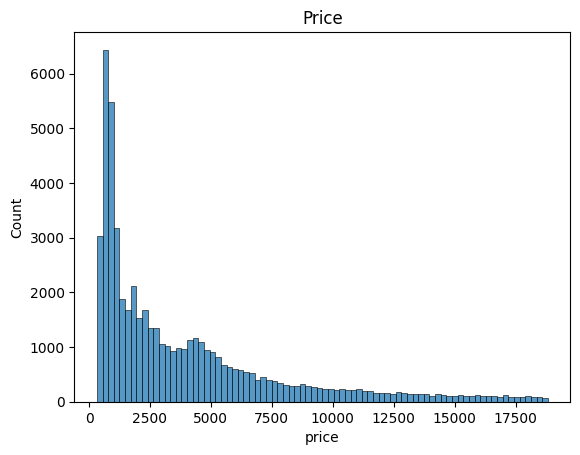

In [82]:
sb.histplot(data = df, x = "price").set_title("Price")


Text(0.5, 1.0, 'cut')

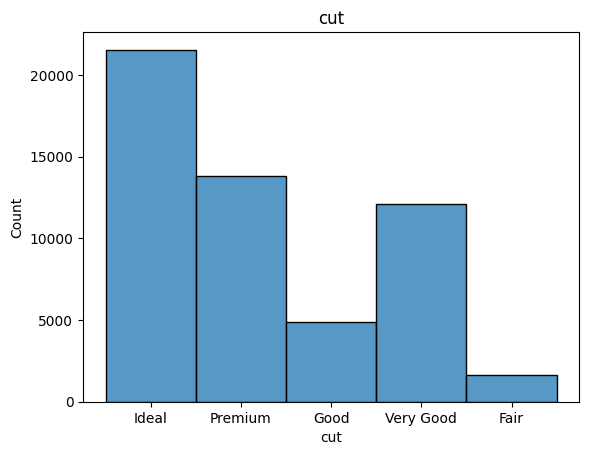

In [83]:
sb.histplot(data = df, x = "cut").set_title("cut")

Text(0.5, 1.0, 'clarity')

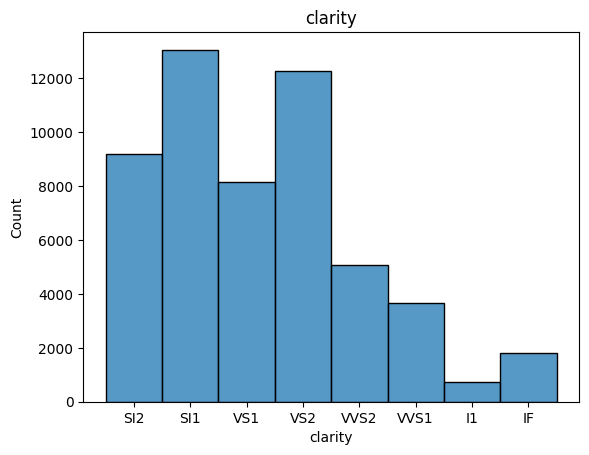

In [84]:
sb.histplot(data = df, x = "clarity").set_title("clarity")

Text(0.5, 1.0, 'color')

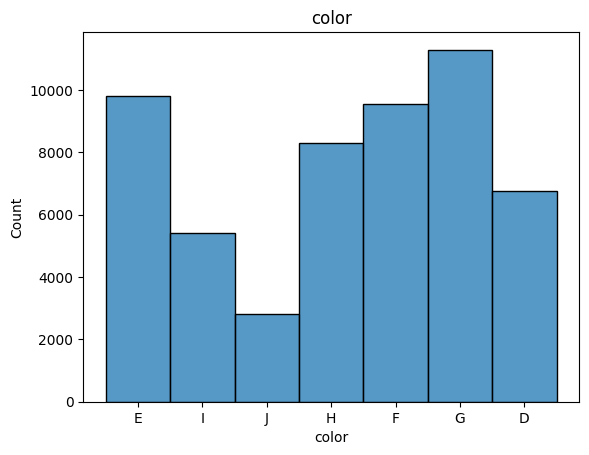

In [85]:
sb.histplot(data = df, x = "color").set_title("color")


# Посмотрим на соотношение цены с цветом (оттеком) и чистотой алмаза

Text(0.5, 1.0, 'Prices - color')

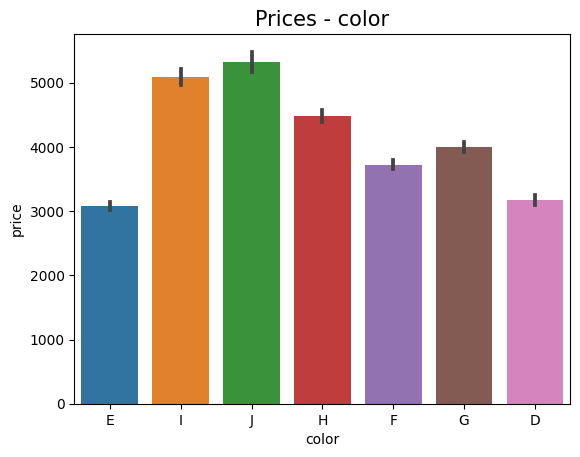

In [86]:
sb.barplot(data = df_new, x="color", y="price").set_title('Prices - color', fontsize = 15)

Вывод: Цвет J самый малочисленный, но и самый дорогой

Text(0.5, 1.0, 'Prices - clarity')

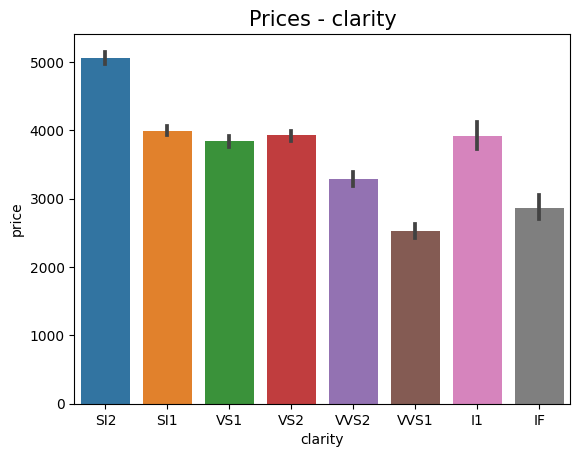

In [87]:
sb.barplot(data = df_new, x="clarity", y="price").set_title('Prices - clarity', fontsize = 15)

Вывод: мы видим явную разницу в ценах в зависимости от цвета (оттенка) и чистоты алмаза.

# Посмотрим на график отношения огранки к цене

Text(0.5, 1.0, 'Prices - cut')

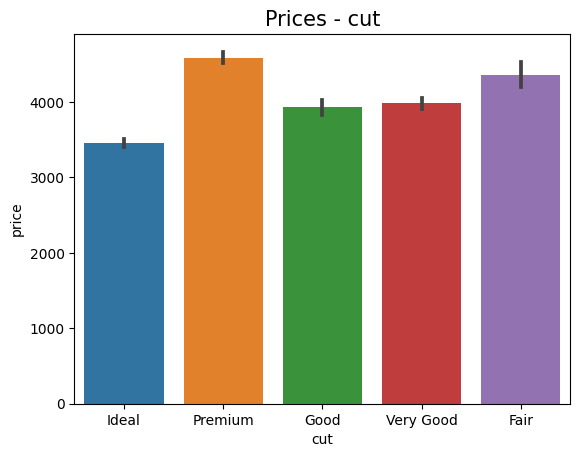

In [88]:
sb.barplot(data = df_new, x="cut", y="price").set_title('Prices - cut', fontsize = 15)

# сделаем сортировку по цене и посмотрим еще раз на график

<Axes: xlabel='cut', ylabel='price'>

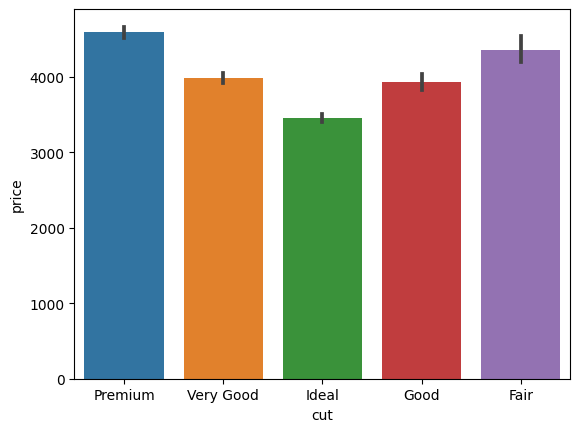

In [89]:
sort_df = df_new.sort_values(by = ["price"] , ascending = False)
sb.barplot(x = "cut", y="price", data = sort_df)

* Вывод: по мере повышения категории алмаза растет и его цена

# Посмотрим на график отношения цены к стоимости в каратах (в разрезе категорий)

примечание: на графиках можно отключать данные из легенды для анализа по конкретным полям

In [90]:
fig = px.scatter(sort_df, x = "carat", y = "price", color='cut', title="Prices - carat (cut)")
fig.show()

In [91]:
fig = px.scatter(sort_df, x = "carat", y = "price", color='color', title="Prices - carat (color)")
fig.show()

In [92]:
fig = px.scatter(sort_df, x = "carat", y = "price", color='clarity', title="Prices by carat (clarity)")
fig.show()

# Посмотрим на данные с помощью BoxPlot

Text(0.5, 1.0, 'Price Distribution by Cut')

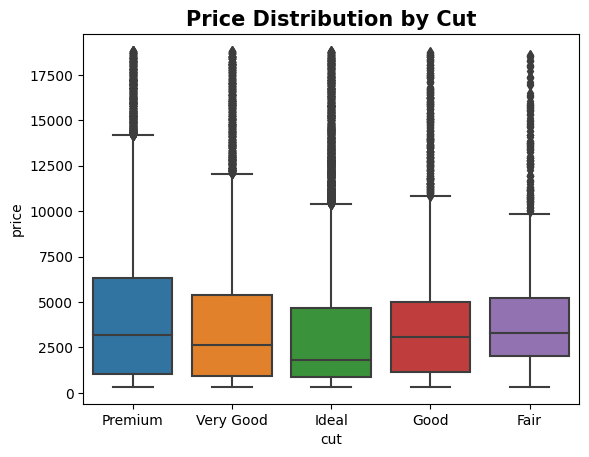

In [93]:
sb.boxplot(data = sort_df, x="cut", y="price")
plt.title("Price Distribution by Cut", fontsize = 15, fontweight = "bold")


# Для того чтобы посмотреть на корреляцию параметров необходимочтобы все параметры в DataFrame был в числовой форме

![image.png]()

In [94]:
sort_df["color"].unique()

array(['I', 'G', 'H', 'F', 'E', 'J', 'D'], dtype=object)

на основании этой таблицы переведем цвет  алмазов в цифровой вид

In [95]:
def color_nom(df_condition):
  df_condition["color_nom"]=0
  for i in range(len(df_condition)):
    if df_condition["color"][i]=='D': df_condition["color_nom"][i]=1
    elif df_condition["color"][i]=='E': df_condition["color_nom"][i]=2
    elif df_condition["color"][i]=='F': df_condition["color_nom"][i]=3
    elif df_condition["color"][i]=='G': df_condition["color_nom"][i]=4
    elif df_condition["color"][i]=='H': df_condition["color_nom"][i]=5
    elif df_condition["color"][i]=='I': df_condition["color_nom"][i]=6
    else: df_condition["color_nom"][i]=7
  return df_condition

df_color=color_nom(sort_df)
df_color.head()

<ipython-input-95-609b2a91bb59>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-609b2a91bb59>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-609b2a91bb59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-609b2a91bb59>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,carat,cut,color,clarity,depth,table,price,length,width,height,cut_nom,color_nom
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,2,6
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,3,4
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,1,4
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,1,4
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,3,5


то-же самое сделаем и с чистотой (clarity) алмаза

In [96]:
sort_df["clarity"].unique()

array(['VS2', 'SI1', 'IF', 'SI2', 'VS1', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [97]:
def clarity_nom(df_condition):
  df_condition["clarity_nom"]=0
  for i in range(len(df_condition)):
    if df_condition["clarity"][i]=='IF': df_condition["clarity_nom"][i]=1
    elif df_condition["clarity"][i]=='VVS1': df_condition["clarity_nom"][i]=2
    elif df_condition["clarity"][i]=='VVS2': df_condition["clarity_nom"][i]=3
    elif df_condition["clarity"][i]=='VS1': df_condition["clarity_nom"][i]=4
    elif df_condition["clarity"][i]=='VS2': df_condition["clarity_nom"][i]=5
    elif df_condition["clarity"][i]=='SI1': df_condition["clarity_nom"][i]=6
    elif df_condition["clarity"][i]=='SI2': df_condition["clarity_nom"][i]=7
    else: df_condition["clarity_nom"][i]=8
  return df_condition

df_clarity=clarity_nom(sort_df)
df_clarity.head()

<ipython-input-97-db9af1f07845>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-db9af1f07845>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-db9af1f07845>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-db9af1f07845>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,carat,cut,color,clarity,depth,table,price,length,width,height,cut_nom,color_nom,clarity_nom
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,2,6,5
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,3,4,6
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,1,4,1
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,1,4,7
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,3,5,6


# Посмотрим на корреляцию наших данных

<ipython-input-98-ec3d826abfb1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

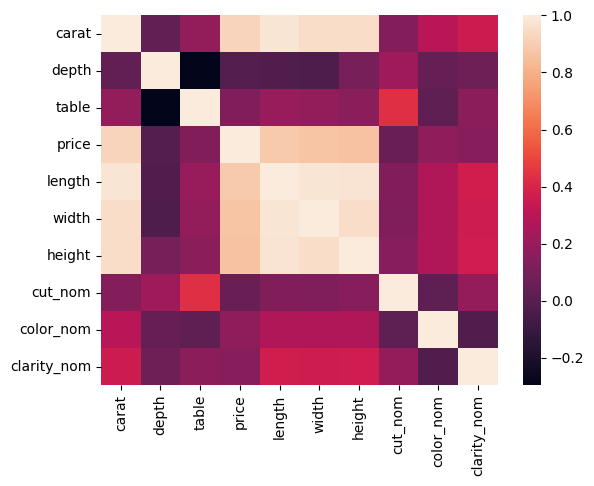

In [98]:
sb.heatmap(df_clarity.corr())

Вывод: из тепловой диагарммы мы видим следующее

а) низкая кореляция между столбцами table и depth - обусловленна тем что каждый бриллиант изготавливается исходя из размеров камня, но с учетом соблюдения "правил" огранки.

б) высокая корреляция между размерами (length,	width и	height) и carat - обусловлена тем что carat это фактически вес блиллианта (1 карат равен 0,2 гр), и чем больше размеры бриллианта тем больше carat

в) высокая корреляция между carat и стоимостью также объясняется тем че больше carat, тем больше и тяжелее сам бриллиант.

г) высокая корреляция между столбцами length,	width и	height связанна с тем что бриллиант имеет стандартную (привычную) форму, где длина,  ширина и высота взаимосвязанны.

д) низкая корреляция между стоимостью и цветом и чистотой алмаза можно объяснить большим количеством дынных в этих группах с разными уровнями градации. На графике видно что очень чистых и с дорогим оттенком бриллиантов достаточно мало, но в то же время стоимость их гораздо выше   


Главный вывод из данного DtaFrame можно сделать такой, что крупные бриллианты безупречного качества встречаются редко.